## Qualitative analysis

This is a notebook for qualitatively analysing nuScenes samples evaluated by the two safety-metrics. To gather the data used in this analysis, the main() function of the DetectionEval class of the modified nuscenes devkit provided should be run with the save_metrics_samples parameters set to a positive amount of samples. 

In [1]:
import numpy as np
import pandas as pd
import os
import json
import random
from nuscenes import NuScenes
from PIL import Image
from visualization_helpers import * 



# Visualize for all detectors to compare
data_root ='/cluster/work/andronn/MasterThesis/MASTER/master_repo/Thesis-Evaluating-Safety-Oriented-Metrics-for-Object-Detectors/results/'
detectors = ['ssn-REGNET/', 'regnet-regnetX_FPN/', 'pointpillars-fpn/']
data_loc = [data_root+detector+'METRIC_SAMPLES/' for detector in detectors]



In [2]:
# Assumes a saved json with all sample tokens in data_root on form { 'sample_tokens': list(...) }
with open(os.path.join(data_root, 'sample_tokens.json'), 'r') as f:
    sample_tokens = json.load(f)
    
random.seed(42)
sample_tokens = list(sample_tokens['sample_tokens'])
random.shuffle(sample_tokens)
plot_examples = 20
sample_tokens = sample_tokens[:plot_examples]


In [3]:
# Choose an index in the sample list to analyse
idx = int(input("Input sample index to analyze: "))

# visualize 

Input sample index to analyze: 3


Sample visualization:


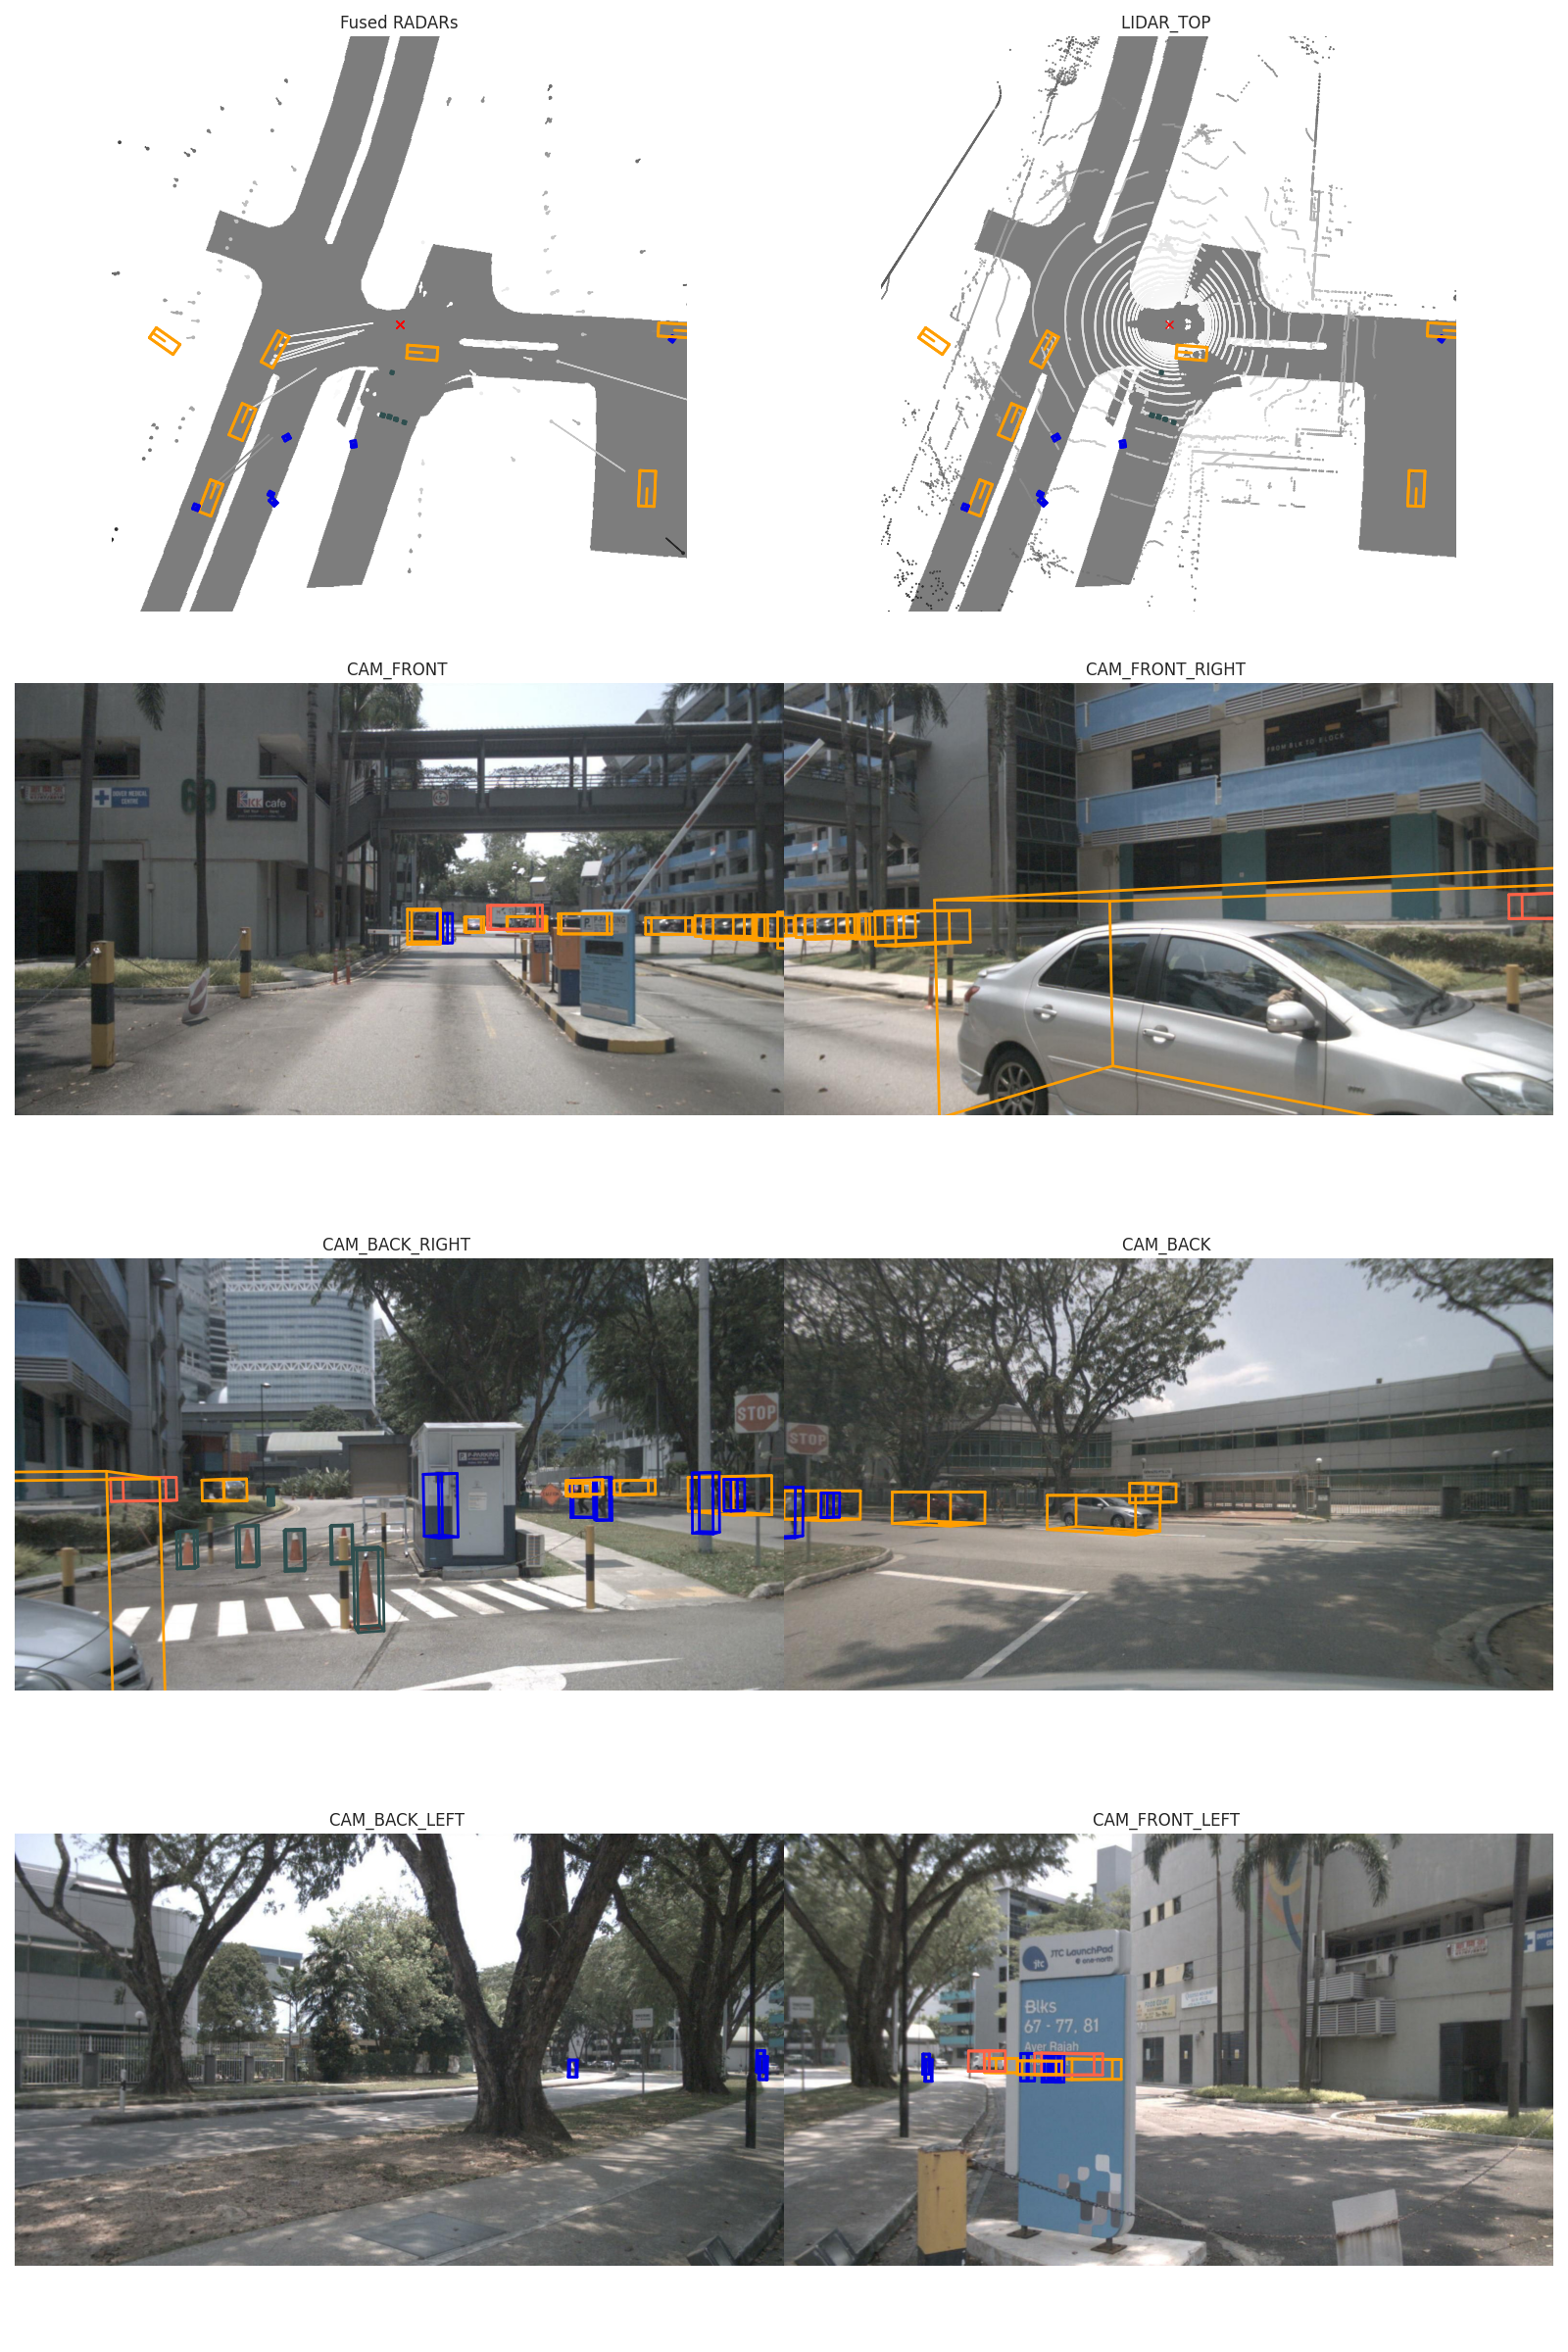

In [4]:
print("Sample visualization:")
Image.open(data_loc[0]+sample_tokens[idx]+'/SENSOR_ANN_VIZ.png')

In [9]:
print("AP and PR summaries:")
from IPython.display import display
dfs = [pd.read_csv(path + sample_tokens[idx] + '/AP_summary.txt', sep=";", header=None) for path in data_loc]
for df in dfs:
    display(df)
#visualize_table([d+sample_tokens[idx]+'/PR_summary.txt' for d in data_loc])
#visualize_table([d+sample_tokens[idx]+'/AP_summary.txt' for d in data_loc])

AP and PR summaries:


0                                 1             2  \
0  Model ssn-REGNET                    class_name car   dist_th 2.0   
1  Model ssn-REGNET                  class_name truck   dist_th 2.0   
2  Model ssn-REGNET                    class_name bus   dist_th 2.0   
3  Model ssn-REGNET                class_name trailer   dist_th 2.0   
4  Model ssn-REGNET   class_name construction_vehicle   dist_th 2.0   
5  Model ssn-REGNET             class_name pedestrian   dist_th 2.0   
6  Model ssn-REGNET             class_name motorcycle   dist_th 2.0   
7  Model ssn-REGNET                class_name bicycle   dist_th 2.0   
8  Model ssn-REGNET           class_name traffic_cone   dist_th 2.0   
9  Model ssn-REGNET                class_name barrier   dist_th 2.0   

                        3                            4  
0    AP 0.774962962962963   AP_crit 0.8782069843867741  
1                  AP 0.0                  AP_crit 0.0  
2                  AP 0.0                  AP_crit 0.0  
3                  AP 0.0                  AP_crit 0.0  
4                  AP 0.0                  AP_crit 0.0  
5   AP 0.9891067538126365   AP_crit 0.9888888888888892  
6                  AP 0.0                  AP_crit 0.0  
7                  AP 0.0                  AP_crit 0.0  
8   AP 0.3421810699588478   AP_crit 0.3428599491092937  
9                  AP 0.0                  AP_crit 0.0

0                                 1             2  \
0  Model regnet-regnetX_FPN                    class_name car   dist_th 2.0   
1  Model regnet-regnetX_FPN                  class_name truck   dist_th 2.0   
2  Model regnet-regnetX_FPN                    class_name bus   dist_th 2.0   
3  Model regnet-regnetX_FPN                class_name trailer   dist_th 2.0   
4  Model regnet-regnetX_FPN   class_name construction_vehicle   dist_th 2.0   
5  Model regnet-regnetX_FPN             class_name pedestrian   dist_th 2.0   
6  Model regnet-regnetX_FPN             class_name motorcycle   dist_th 2.0   
7  Model regnet-regnetX_FPN                class_name bicycle   dist_th 2.0   
8  Model regnet-regnetX_FPN           class_name traffic_cone   dist_th 2.0   
9  Model regnet-regnetX_FPN                class_name barrier   dist_th 2.0   

                        3                             4  
0   AP 0.8534198466142912     AP_crit 0.886712401673837  
1                  AP 0.0                   AP_crit 0.0  
2                  AP 0.0                   AP_crit 0.0  
3                  AP 0.0                   AP_crit 0.0  
4                  AP 0.0                   AP_crit 0.0  
5   AP 0.7736625514403294    AP_crit 0.4190026809231317  
6                  AP 0.0                   AP_crit 0.0  
7                  AP 0.0                   AP_crit 0.0  
8   AP 0.4398670094010596   AP_crit 0.45629840785922027  
9                  AP 0.0                   AP_crit 0.0

0                                 1             2  \
0  Model pointpillars-fpn                    class_name car   dist_th 2.0   
1  Model pointpillars-fpn                  class_name truck   dist_th 2.0   
2  Model pointpillars-fpn                    class_name bus   dist_th 2.0   
3  Model pointpillars-fpn                class_name trailer   dist_th 2.0   
4  Model pointpillars-fpn   class_name construction_vehicle   dist_th 2.0   
5  Model pointpillars-fpn             class_name pedestrian   dist_th 2.0   
6  Model pointpillars-fpn             class_name motorcycle   dist_th 2.0   
7  Model pointpillars-fpn                class_name bicycle   dist_th 2.0   
8  Model pointpillars-fpn           class_name traffic_cone   dist_th 2.0   
9  Model pointpillars-fpn                class_name barrier   dist_th 2.0   

                         3                             4  
0    AP 0.8199188049705479    AP_crit 0.8670279709314902  
1                   AP 0.0                   AP_crit 0.0  
2                   AP 0.0                   AP_crit 0.0  
3                   AP 0.0                   AP_crit 0.0  
4                   AP 0.0                   AP_crit 0.0  
5    AP 0.7111394345312475   AP_crit 0.23410792342614897  
6                   AP 0.0                   AP_crit 0.0  
7                   AP 0.0                   AP_crit 0.0  
8   AP 0.06034899022715785    AP_crit 0.1259331681258405  
9                   AP 0.0                   AP_crit 0.0

Crit values:


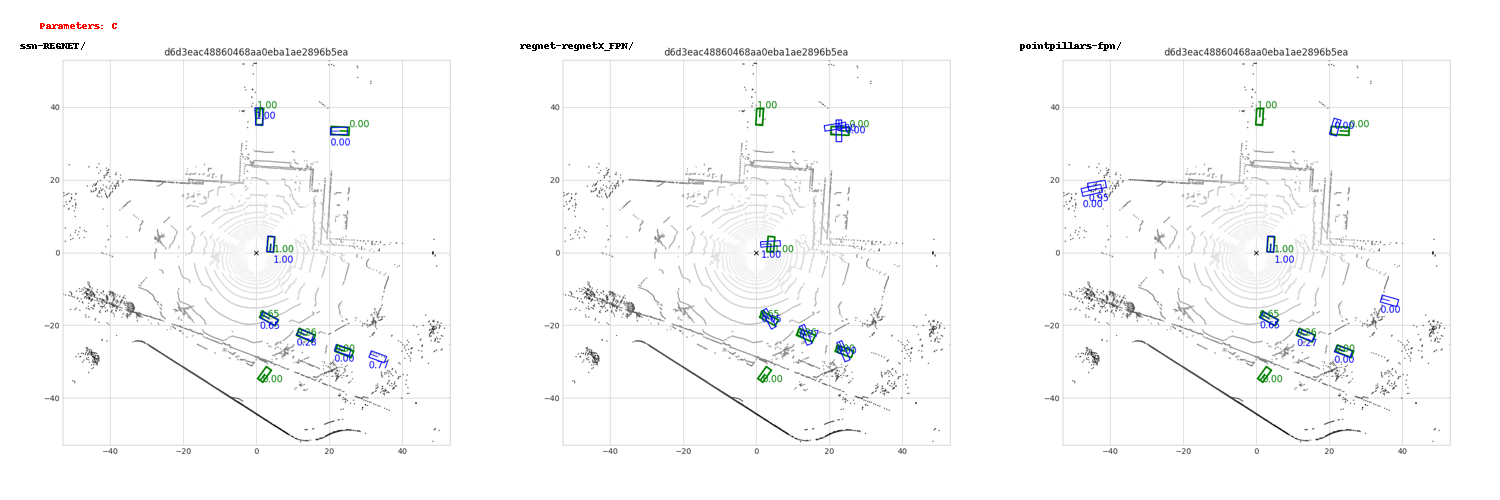

In [6]:
print("Crit values:")
visualize_crits(data_loc, detectors, sample_tokens[idx], 'C')